# Práctica 2
## Jesús María Herruzo Luque

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1.1. Crear la siguiente red no dirigida
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (3,6), (4,5), (4,6), (4,8), (4,9), (5,6), (5,8), (5,9), (6,7), (6,8), (7,10) ])

In [3]:
#1.2. Calcular el número de nodos y el número de enlaces
print('Numero de nodos:', G.number_of_nodes(), ' Numero de enlaces:', G.number_of_edges())

Numero de nodos: 10  Numero de enlaces: 14


In [4]:
#1.3. Añadir a la red los siguientes atributos tipo string: (nombre=red1), (tipo=no-dirigida)
G.graph['nombre'] = 'red1'
G.graph['tipo'] = 'no-dirigida'
print('Atributos:', G.graph)

Atributos: {'nombre': 'red1', 'tipo': 'no-dirigida'}


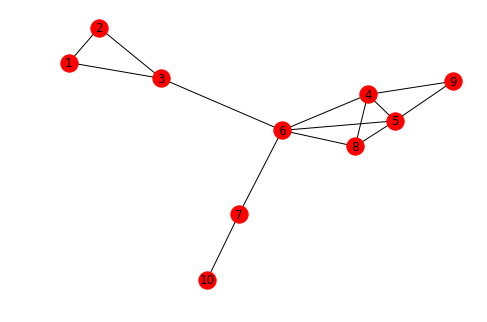

In [5]:
#1.4. Visualizar la red utilizando un layout aleatorio con las etiquetas de los nodos.
nx.draw(G, with_labels = True)

In [6]:
#1.5. Dado un nodo U, e.g. U=6, calcular los vecinos del nodo.
nodo_id = 6
print('Vecinos del nodo', nodo_id, ':', G.neighbors(6))

Vecinos del nodo 6 : <dict_keyiterator object at 0x0000021839CDD688>


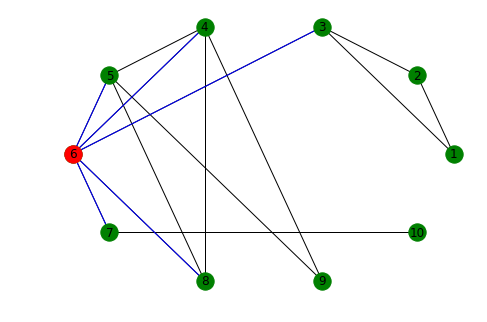

In [7]:
#1.6. En la visualización de la red anterior, cambiar el color del nodo U y todos sus enlaces
enlaces = []
for enlace in G.edges():
    if nodo_id in enlace:
        enlaces.append(enlace)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, node_color = 'g', edge_color = 'black')
nx.draw_networkx_nodes(G, pos=pos, nodelist=[6], node_color='red')
nx.draw_networkx_edges(G, pos=pos, edgelist=enlaces, edge_color='b')

In [8]:
#2.1. A la red anterior, añadir un atributo ‘peso’ a cada enlace creado de acuerdo a una distribución uniforme discreta [1,10].
pesos = R = np.random.randint(1, 11, size=(G.number_of_edges()))
for enlace, peso in zip(G.edges(), pesos):
    G[enlace[0]][enlace[1]]['peso'] = peso
    
G.edges(data=True)

EdgeDataView([(1, 2, {'peso': 4}), (1, 3, {'peso': 6}), (2, 3, {'peso': 7}), (3, 6, {'peso': 5}), (4, 8, {'peso': 3}), (4, 9, {'peso': 2}), (4, 5, {'peso': 6}), (4, 6, {'peso': 9}), (5, 8, {'peso': 6}), (5, 9, {'peso': 10}), (5, 6, {'peso': 9}), (6, 8, {'peso': 3}), (6, 7, {'peso': 1}), (7, 10, {'peso': 6})])

In [9]:
#2.2. Mostrar todos los enlaces con peso mayor que un umbral W (variable escogida libremente por cada uno)
umbral = 7
[(enlace[0], enlace[1], G[enlace[0]][enlace[1]]) for enlace in G.edges() if G[enlace[0]][enlace[1]]['peso'] > umbral]

[(4, 6, {'peso': 9}), (5, 9, {'peso': 10}), (5, 6, {'peso': 9})]

In [10]:
#2.3. Mostrar la distribución de pesos ordenada de menor a mayor.
sorted([enlace[2]['peso'] for enlace in G.edges(data=True)])

[1, 2, 3, 3, 4, 5, 6, 6, 6, 6, 7, 9, 9, 10]

In [11]:
#2.4. Calcular el grado (número de enlaces que tiene cada nodo).
for nodo in G.nodes():
    print('El nodo', nodo, 'tiene grado', G.degree(nodo))

El nodo 1 tiene grado 2
El nodo 2 tiene grado 2
El nodo 3 tiene grado 3
El nodo 4 tiene grado 4
El nodo 5 tiene grado 4
El nodo 6 tiene grado 5
El nodo 7 tiene grado 2
El nodo 8 tiene grado 3
El nodo 9 tiene grado 2
El nodo 10 tiene grado 1


In [12]:
#2.5. Calcular los tres nodos con mayor grado
sorted([nodo for nodo in G.nodes()], key=lambda nodo: G.degree(nodo), reverse=True)[:3]

[6, 4, 5]

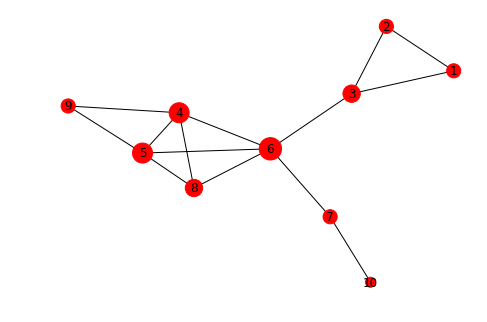

In [13]:
#2.6. Visualizar la red utilizando un layout kamada_kawai, con las etiquetas de los nodos, siendo el tamaño de los 
#nodos proporcional a su valor de su grado (multiplicado por 1000 como factor de escala).
pos = nx.layout.kamada_kawai_layout(G)
grados = np.array([G.degree(nodo) for nodo in G.nodes()])
nx.draw(G, pos, with_labels=True, node_size=grados*100)

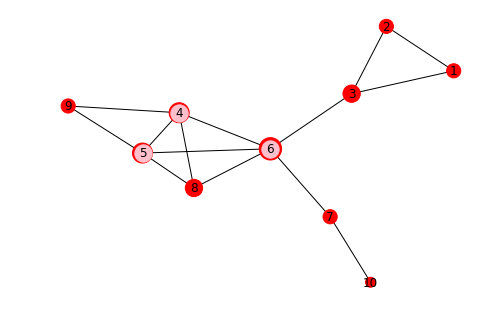

In [14]:
#2.7. En la visualización anterior, cambiar el color de los 3 nodos de mayor grado.
mayores_nodos = sorted([nodo for nodo in G.nodes()], key=lambda nodo: G.degree(nodo), reverse=True)[:3]
nx.draw(G, pos, with_labels=True, node_size=grados*100)
nx.draw_networkx_nodes(G, pos=pos, nodelist=mayores_nodos, node_color='pink')

In [15]:
#3.1. Importar la red social del club de karate Zachary (formato gml):
#http://www-personal.umich.edu/~mejn/netdata/
K = nx.read_gml('karate.gml', label='id') #nx.karate_club_graph()

In [16]:
#3.2. Calcular el número de nodos y el número de enlaces.
print('Nodos', K.number_of_nodes(), 'Enlaces', K.number_of_edges())

Nodos 34 Enlaces 78


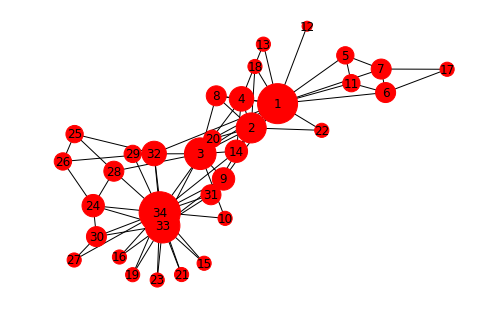

In [17]:
#3.3. Visualizar la red utilizando el layout que considere oportuno, con las etiquetas de los nodos, 
#siendo el tamaño de los nodos proporcional a su valor de grado (multiplicado por 100 como factor de escala).
grados = np.array([K.degree(nodo) for nodo in K.nodes()])
pos = nx.layout.fruchterman_reingold_layout(K)
nx.draw(K, pos, with_labels=True, node_size=grados*100)